# Solver

## Config file

In [1]:
from pathlib import Path
import os

import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

HERE = Path(os.getcwd()) # Path(__file__) won't work in Jupyter
HERE

PosixPath('/home/hangman/Documents/solver')

In [2]:
with open(HERE / 'config' / 'settings.yaml.bak') as f:
    config = yaml.safe_load(f)
config

{'time_end': 3,
 'time_step': 0.05,
 'f_0': 2,
 'mass': 1.0,
 'viscosity': 1.0,
 'ft_fname': 'f_t.csv',
 'area_fname': 'area.csv'}

In [3]:
mass = 10
viscosity = 10
new_config = {
    'time_end'    : 3,
    'time_step'   : 0.5,
    'f_0'         : 0,
    'model_params': [mass, viscosity],
    'ft_fname'    : 'f_t.csv',
    'area_fname'  : 'area.csv',
}

In [4]:
with open(HERE / 'config' / 'settings.yaml', 'w') as f:
    yaml.dump(new_config, f)

## Simulation

`cargo run` will read `config/settings.yaml` and produce:

- `result/`
  - `<config["area_fname"]>.csv`
  - `<config["ft_fname"]>.csv`

In [5]:
!cargo run

   Compiling solver v0.1.0 (/home/hangman/Documents/solver)
    Finished `dev` profile [unoptimized + debuginfo] target(s) in 0.29s    
     Running `target/debug/solver`
Solver { time_end: 3.0, time_step: 0.5, f_0: 0.0, mass: 10.0, viscosity: 10.0, gravity: 9.8 }

=== Final Values f(3) ===
Analytical solution: 9.312087
Euler method:        9.646875
Trapezoidal method:  9.215875
Runge-Kutta method:  9.310926

=== Integrals ∫f(t)dt from 0 to 3 ===
Analytical integral:           15.504433
Euler ODE + Trap integration:  22.164845
Trap ODE + Trap integration:   19.416136
RK4 ODE + Trap integration:    19.888674



## Plot

In [6]:
def plot_data(df) -> plt:
    plt.plot(
        df["timestamp"], df["analytical"],
        label="analytical",
        color="green"
    )
    plt.plot(
        df["timestamp"], df["euler"],
        label="euler",
        color="blue",
        linestyle="--"
    )
    plt.plot(
        df["timestamp"], df["trapezoid"],
        label="trapezoid",
        color="orange",
        linestyle=":"
    )
    plt.plot(
        df["timestamp"], df["rk4"],
        label="Runge-Kutta",
        color="magenta",
        linestyle=":"
    )
    plt.legend()
    return plt

### $f(t)$ (1st integral)

In [7]:
ft_df = pd.read_csv(
    HERE / "result" / "f_t.csv",
)
ft_df

,timestamp,euler,trapezoid,rk4,analytical
0,0.0,0.000000,0.000000,0.000000,0.000000
1,0.5,4.900000,3.675000,3.853646,3.855999
2,1.0,7.350000,5.971875,6.191926,6.194781
3,1.5,8.575001,7.407422,7.610726,7.613324
4,2.0,9.187500,8.304639,8.471612,8.473715
5,2.5,9.493750,8.865399,8.993973,8.995567
6,3.0,9.646875,9.215875,9.310926,9.312087


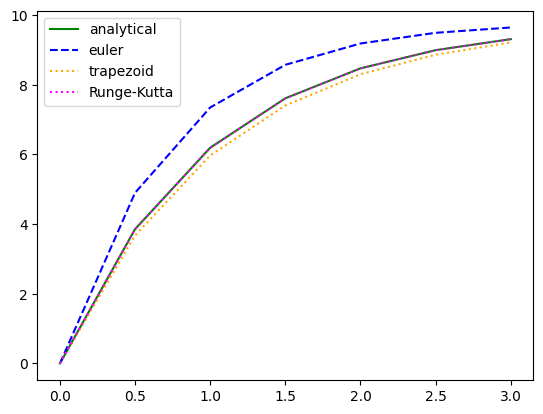

In [8]:
plot_data(ft_df).show()

### area (2nd integral)

In [9]:
area_df = pd.read_csv(
    HERE / "result" / "area.csv",
)
area_df

,timestamp,euler,trapezoid,rk4,analytical
0,0.0,0.000000,0.000000,0.000000,0.000000
1,0.5,1.225000,0.918750,0.963411,0.000000
2,1.0,4.287500,3.330469,3.474805,1.044001
3,1.5,8.268750,6.675293,6.925467,3.605219
4,2.0,12.709375,10.603308,10.946053,7.086676
5,2.5,17.379688,14.895817,15.312449,11.126286
6,3.0,22.164845,19.416136,19.888674,15.504433


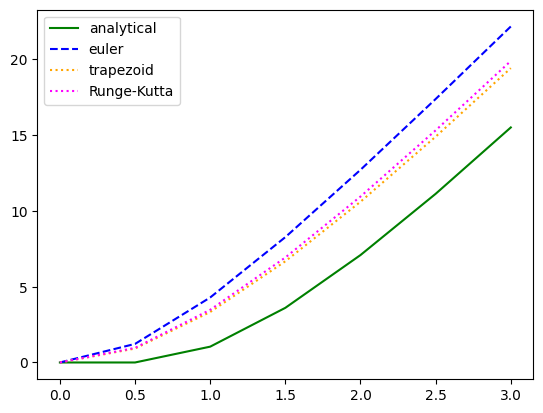

In [10]:
plot_data(area_df).show()